In [10]:
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
from tqdm import tqdm
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPool2D
import matplotlib.pyplot as plt

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1bfa5ea5060>)

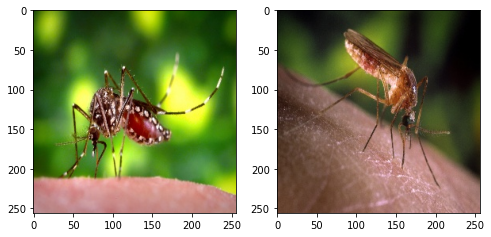

In [8]:
# use cv2 read image
img1 = cv2.imread('./mosquito/train/Aedes/Aedes1.jpg')

# if read image is none that throw to error
img1 = cv2.cvtColor(img1 , cv2.COLOR_BGR2RGB)

img2 = cv2.imread('./mosquito/train/Culex/Culex1.jpg')
img2 = cv2.cvtColor(img2 , cv2.COLOR_BGR2RGB)

# display image from data
plt.figure(figsize=(8,4))
plt.subplot(121),plt.imshow(img1)
plt.subplot(122),plt.imshow(img2)

In [27]:
# prepare image data
width = 128
num_classes = 2
trainpath = 'mosquito/train/'
testpath = 'mosquito/test/'
trainImg = [trainpath+f for f in listdir(trainpath)]
testImg = [testpath+f for f in listdir(testpath)]
trainImg , testImg

(['mosquito/train/Aedes', 'mosquito/train/Culex'],
 ['mosquito/test/Aedes', 'mosquito/test/Culex'])

In [37]:
# show function image to data
def img2data(path):
  # binary data in array 3D (128,128,3)
  rawImgs = []
  # label for predict
  labels = []

  for imagePath in (path):
      for item in tqdm(listdir(imagePath)):
          # list all item in path
          file = join(imagePath, item)
          # Reshape image to data
          if file[-1] =='g':
            img = cv2.imread(file , cv2.COLOR_BGR2RGB)
            img = cv2.resize(img ,(width,width))
            rawImgs.append(img)
            
            # input label data
            l = imagePath.split('/')[2]
            
            if l == 'Aedes':
              labels.append([1,0])         
            elif l == 'Culex':
              labels.append([0,1])
  return rawImgs, labels

In [39]:
x_train, y_train = img2data(trainImg)
x_test, y_test = img2data(testImg)

100%|█████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 937.47it/s]


In [40]:
# convert to numpy for show size
x_train = np.array(x_train) # (1200, 128,128,3)
y_train = np.array(y_train)
x_test = np.array(x_test) # (60, 128,128,3)
y_test = np.array(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# ((1200, 128, 128, 3), (1200, 2), (60, 128, 128, 3), (60, 2))
x_train.shape,y_train.shape,x_test.shape, y_test.shape

((1200, 128, 128, 3), (1200, 2), (60, 128, 128, 3), (60, 2))

In [41]:
# CNN model
model0 = Sequential([
        Conv2D(128, (3,3), activation='relu', input_shape=(width, width, 3)),
        MaxPool2D(2),
        Conv2D(128,(3,3) , activation='relu'),
        MaxPool2D(pool_size=(2,2 )),
        Dense(16),
        Flatten(),

        Dense(num_classes, activation='softmax') #softmax for one hot . . # sigmoid for 0/1
])

In [44]:
model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 dense (Dense)               (None, 30, 30, 16)        2064      
                                                                 
 flatten (Flatten)           (None, 14400)             0

In [45]:
# implement optimizer model
model0.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics= ['accuracy'])
batch_size = 32 # batch size controls the number of training samples to work through before the model’s internal parameters are updated
epochs = 10 # number of epochs controls the number of complete passes through the training dataset.

In [46]:
# input model
history = model0.fit(x_train, y_train ,batch_size=batch_size, epochs=epochs ,validation_data=(x_test, y_test))

Epoch 1/10
38/38 [==============================] - 39s 996ms/step - loss: 0.3933 - accuracy: 0.8250 - val_loss: 0.2453 - val_accuracy: 0.8833
Epoch 2/10
38/38 [==============================] - 46s 1s/step - loss: 0.1224 - accuracy: 0.9567 - val_loss: 0.1036 - val_accuracy: 0.9667
Epoch 3/10
38/38 [==============================] - 45s 1s/step - loss: 0.1137 - accuracy: 0.9650 - val_loss: 0.1666 - val_accuracy: 0.9167
Epoch 4/10
38/38 [==============================] - 42s 1s/step - loss: 0.1015 - accuracy: 0.9608 - val_loss: 0.2668 - val_accuracy: 0.9000
Epoch 5/10
38/38 [==============================] - 43s 1s/step - loss: 0.0363 - accuracy: 0.9883 - val_loss: 0.1007 - val_accuracy: 0.9833
Epoch 6/10
38/38 [==============================] - 41s 1s/step - loss: 0.0134 - accuracy: 0.9967 - val_loss: 0.1349 - val_accuracy: 0.9667
Epoch 7/10
38/38 [==============================] - 42s 1s/step - loss: 0.0106 - accuracy: 0.9975 - val_loss: 0.1323 - val_accuracy: 0.9833
Epoch 8/10
38/38 

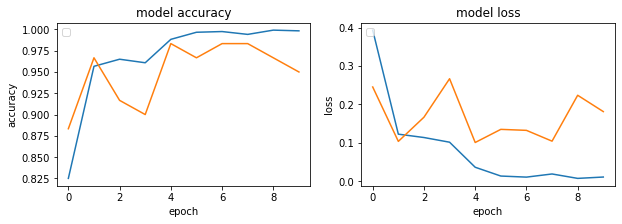

In [53]:
# implement accuracy and loss predict
# the graph that show image classification in CNN model find model accuracy and loss in each epoch 
import matplotlib.pyplot as plt
# fig size of output
plt.figure(figsize=(10,3))

# plot model accuracy
plt.subplot(121),
plt.title('model accuracy');plt.ylabel('accuracy');plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.plot(history.history['accuracy']);plt.plot(history.history['val_accuracy'])

# plot model loss
plt.subplot(122)
plt.title('model loss');plt.ylabel('loss');plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.plot(history.history['loss']);plt.plot(history.history['val_loss'])

In [56]:
# find path of test model
testpath = 'mosquito/test/'
testImg = [testpath+f for f in listdir(testpath)]
for imagePath in (testImg):
    for i,item in enumerate(listdir(imagePath)):
        file = join(imagePath, item)
        # print(file)

mosquito/test/Aedes\Aedes12_flip.jpg
1/1 [==============================] - 0s 26ms/step


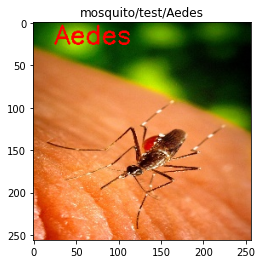

mosquito/test/Aedes\Aedes12_scale.jpg
1/1 [==============================] - 0s 27ms/step


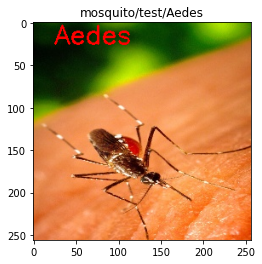

mosquito/test/Aedes\Aedes15_scale.jpg
1/1 [==============================] - 0s 23ms/step


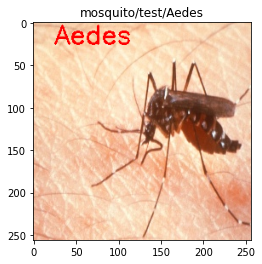

mosquito/test/Aedes\Aedes16_add5.jpg
1/1 [==============================] - 0s 21ms/step


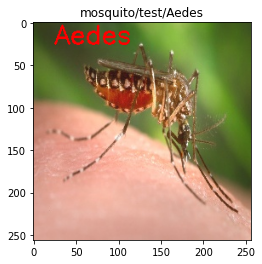

mosquito/test/Aedes\Aedes18_add0.jpg
1/1 [==============================] - 0s 21ms/step


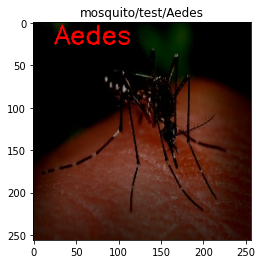

mosquito/test/Aedes\Aedes18_blur.jpg
1/1 [==============================] - 0s 28ms/step


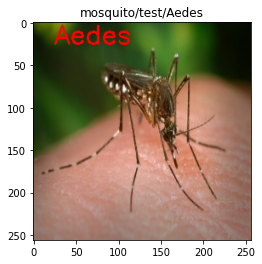

mosquito/test/Aedes\Aedes18_saturate.jpg
1/1 [==============================] - 0s 37ms/step


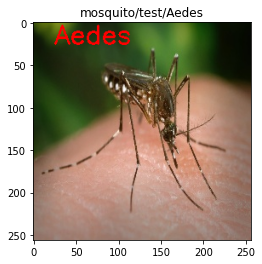

mosquito/test/Aedes\Aedes19_rot1.jpg
1/1 [==============================] - 0s 23ms/step


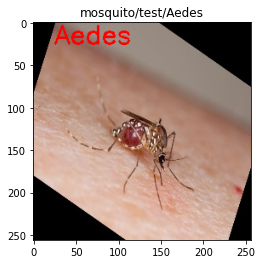

mosquito/test/Aedes\Aedes1_add0.jpg
1/1 [==============================] - 0s 24ms/step


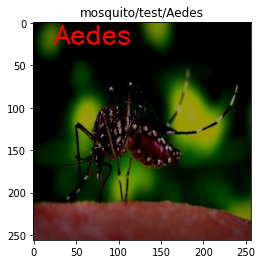

mosquito/test/Aedes\Aedes20_add8.jpg
1/1 [==============================] - 0s 31ms/step


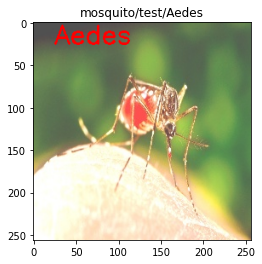

mosquito/test/Aedes\Aedes20_piece.jpg
1/1 [==============================] - 0s 24ms/step


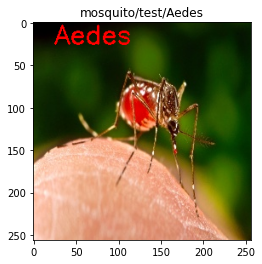

mosquito/test/Aedes\Aedes22_flip.jpg
1/1 [==============================] - 0s 22ms/step


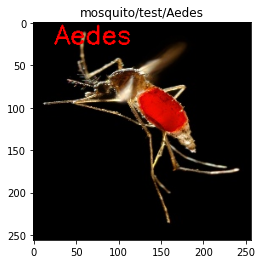

mosquito/test/Aedes\Aedes23_scale.jpg
1/1 [==============================] - 0s 25ms/step


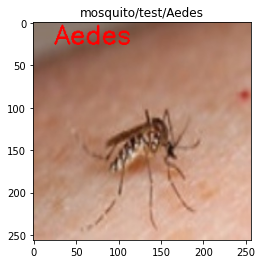

mosquito/test/Aedes\Aedes24_add4.jpg
1/1 [==============================] - 0s 28ms/step


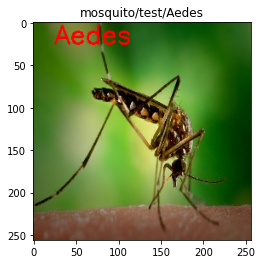

mosquito/test/Aedes\Aedes25_add8.jpg
1/1 [==============================] - 0s 21ms/step


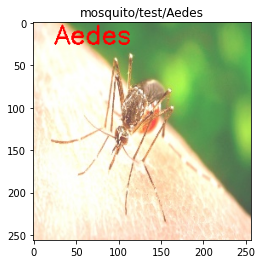

mosquito/test/Aedes\Aedes25_rot2.jpg
1/1 [==============================] - 0s 22ms/step


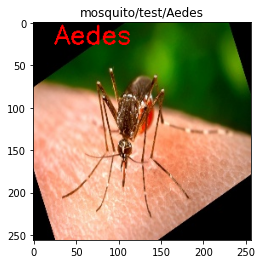

mosquito/test/Aedes\Aedes27_add5.jpg
1/1 [==============================] - 0s 22ms/step


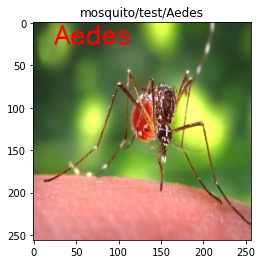

mosquito/test/Aedes\Aedes27_gam_con2.jpg
1/1 [==============================] - 0s 24ms/step


mosquito/test/Aedes\Aedes2_flip.jpg
1/1 [==============================] - 0s 24ms/step


mosquito/test/Aedes\Aedes30_gam_con.jpg
1/1 [==============================] - 0s 22ms/step


mosquito/test/Aedes\Aedes30_saturate.jpg
1/1 [==============================] - 0s 22ms/step


mosquito/test/Aedes\Aedes32_blur.jpg
1/1 [==============================] - 0s 22ms/step


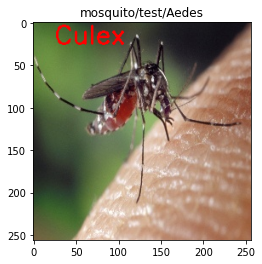

mosquito/test/Aedes\Aedes32_perspective.jpg
1/1 [==============================] - 0s 22ms/step


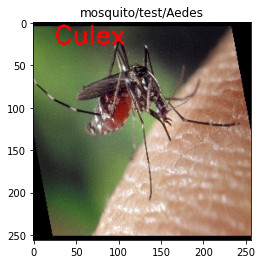

mosquito/test/Aedes\Aedes32_scale.jpg
1/1 [==============================] - 0s 22ms/step


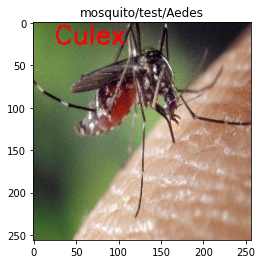

mosquito/test/Aedes\Aedes4_rot2.jpg
1/1 [==============================] - 0s 23ms/step


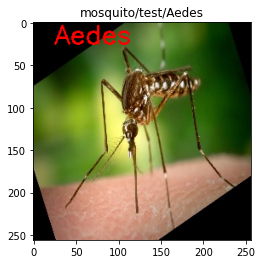

mosquito/test/Aedes\Aedes6_flip.jpg
1/1 [==============================] - 0s 22ms/step


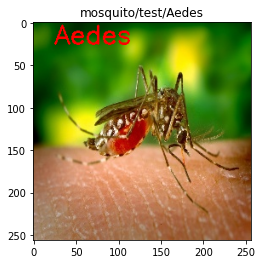

mosquito/test/Aedes\Aedes7_shear2.jpg
1/1 [==============================] - 0s 21ms/step


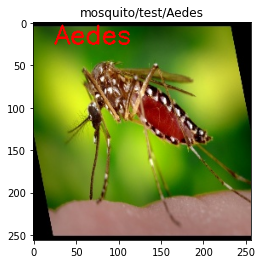

mosquito/test/Aedes\Aedes8_add5.jpg
1/1 [==============================] - 0s 27ms/step


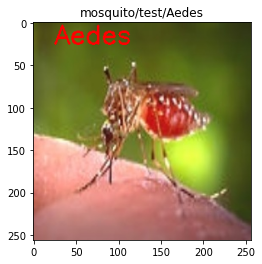

mosquito/test/Aedes\Aedes9_add6.jpg
1/1 [==============================] - 0s 25ms/step


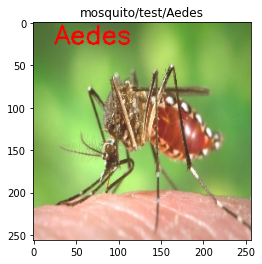

mosquito/test/Aedes\Aedes9_pca.jpg
1/1 [==============================] - 0s 22ms/step


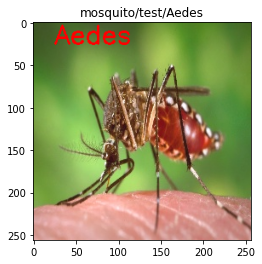

mosquito/test/Culex\Culex10_add3.jpg
1/1 [==============================] - 0s 23ms/step


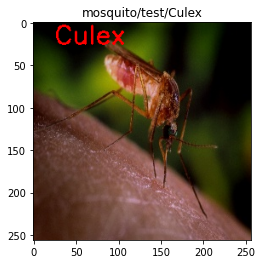

mosquito/test/Culex\Culex10_add7.jpg
1/1 [==============================] - 0s 22ms/step


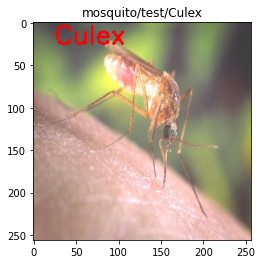

mosquito/test/Culex\Culex10_scale.jpg
1/1 [==============================] - 0s 22ms/step


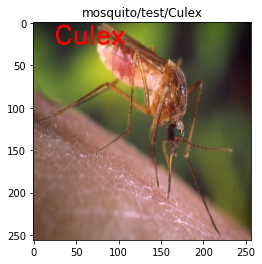

mosquito/test/Culex\Culex11_piece.jpg
1/1 [==============================] - 0s 22ms/step


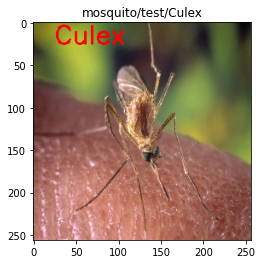

mosquito/test/Culex\Culex11_shear.jpg
1/1 [==============================] - 0s 22ms/step


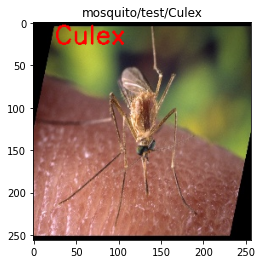

mosquito/test/Culex\Culex12_saturate.jpg
1/1 [==============================] - 0s 47ms/step


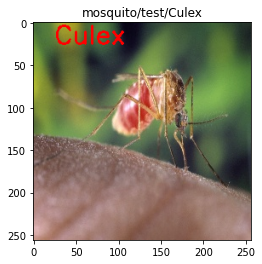

mosquito/test/Culex\Culex13_add2.jpg
1/1 [==============================] - 0s 21ms/step


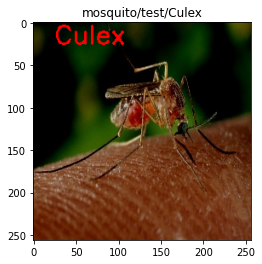

mosquito/test/Culex\Culex13_noise.jpg
1/1 [==============================] - 0s 23ms/step


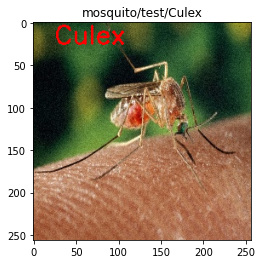

mosquito/test/Culex\Culex13_rot2.jpg
1/1 [==============================] - 0s 24ms/step


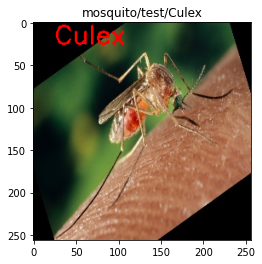

mosquito/test/Culex\Culex15_add8.jpg
1/1 [==============================] - 0s 22ms/step


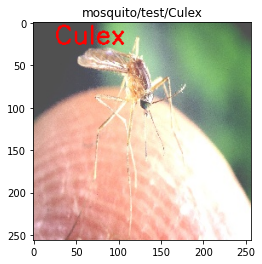

mosquito/test/Culex\Culex15_pca.jpg
1/1 [==============================] - 0s 27ms/step


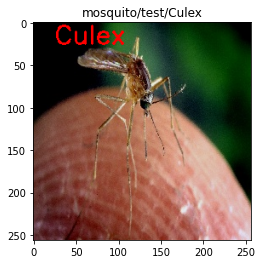

mosquito/test/Culex\Culex16_add9.jpg
1/1 [==============================] - 0s 22ms/step


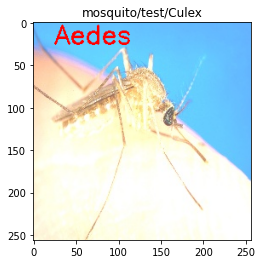

mosquito/test/Culex\Culex16_rot1.jpg
1/1 [==============================] - 0s 24ms/step


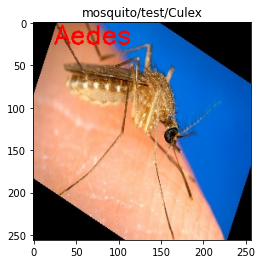

mosquito/test/Culex\Culex17_add2.jpg
1/1 [==============================] - 0s 28ms/step


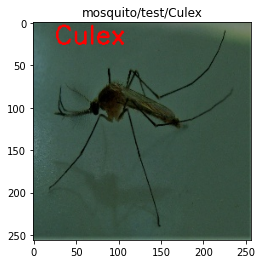

mosquito/test/Culex\Culex17_lin_con.jpg
1/1 [==============================] - 0s 24ms/step


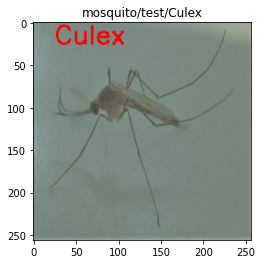

mosquito/test/Culex\Culex18_add4.jpg
1/1 [==============================] - 0s 21ms/step


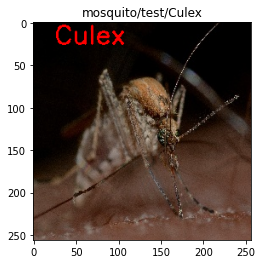

mosquito/test/Culex\Culex18_add9.jpg
1/1 [==============================] - 0s 22ms/step


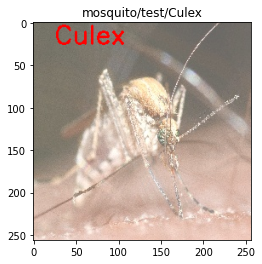

mosquito/test/Culex\Culex18_perspective.jpg
1/1 [==============================] - 0s 22ms/step


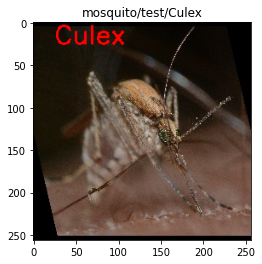

mosquito/test/Culex\Culex19_add4.jpg
1/1 [==============================] - 0s 22ms/step


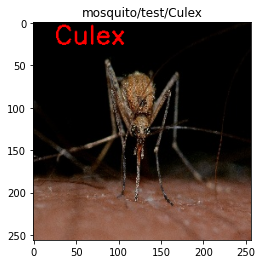

mosquito/test/Culex\Culex19_flip.jpg
1/1 [==============================] - 0s 22ms/step


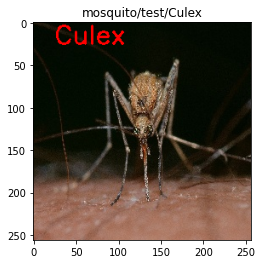

mosquito/test/Culex\Culex20_add6.jpg
1/1 [==============================] - 0s 25ms/step


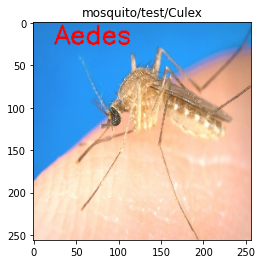

mosquito/test/Culex\Culex20_gam_con2.jpg
1/1 [==============================] - 0s 25ms/step


mosquito/test/Culex\Culex20_shear.jpg
1/1 [==============================] - 0s 25ms/step


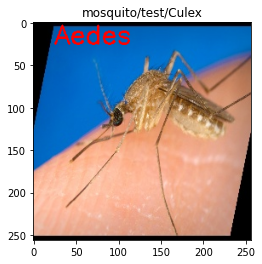

mosquito/test/Culex\Culex21_gam_con.jpg
1/1 [==============================] - 0s 23ms/step


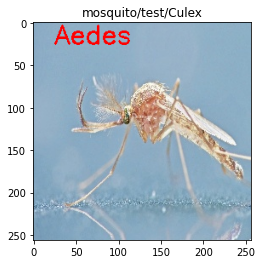

mosquito/test/Culex\Culex21_scale.jpg
1/1 [==============================] - 0s 21ms/step


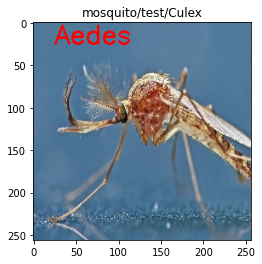

mosquito/test/Culex\Culex22_add0.jpg
1/1 [==============================] - 0s 22ms/step


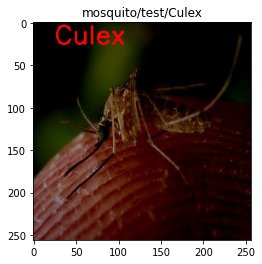

mosquito/test/Culex\Culex22_perspective.jpg
1/1 [==============================] - 0s 22ms/step


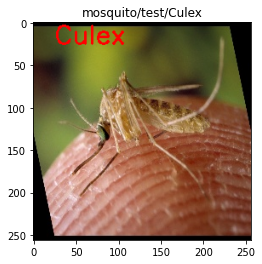

mosquito/test/Culex\Culex23_rot2.jpg
1/1 [==============================] - 0s 21ms/step


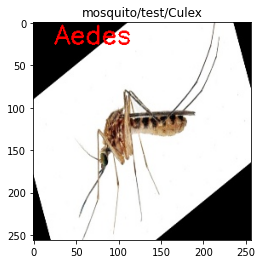

mosquito/test/Culex\Culex9_lin_con.jpg
1/1 [==============================] - 0s 32ms/step


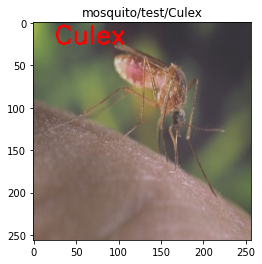

mosquito/test/Culex\Culex9_rot1.jpg
1/1 [==============================] - 0s 23ms/step


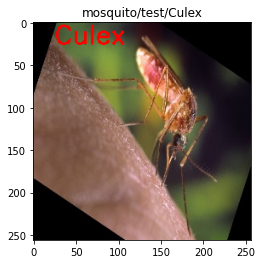

In [63]:
# predict model by use text
testpath = 'mosquito/test/'
testImg = [testpath+f for f in listdir(testpath)]
rimg = []
for imagePath in (testImg):
    for i,item in enumerate(listdir(imagePath)):

        file = join(imagePath, item)
        if file[-1] =='g':
          print(file)
          # read image and convert to numpy array (128,128,3)
          imgori = cv2.imread(file)
          imgori = cv2.cvtColor(imgori , cv2.COLOR_BGR2RGB)
          img = cv2.resize(imgori ,(width,width))
          rimg = np.array(img)
          rimg = rimg.astype('float32')
          rimg /= 255
          rimg = np.reshape(rimg ,(1,128,128,3))
        
          # predict image
          predict = model0.predict(rimg) # rate of Aedes/Culex in CNN model
          label = ['Aedes','Culex']
          result = label[np.argmax(predict)] # use max rate of CNN model 
          plt.title(imagePath)
          cv2.putText(imgori, str(result), (25,25), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2 )
          
          plt.imshow(imgori)
          plt.show()